<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/220511_SD_in_Py_Harmonics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.transentis.com/simple-python-library-system-dynamics/en/
!pip install BPTK_Py

     |████████████████████████████████| 150 kB 4.4 MB/s 
     |████████████████████████████████| 149 kB 47.1 MB/s 
     |████████████████████████████████| 461 kB 45.0 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 749 kB 53.6 MB/s 
  Created wheel for parsimonious: filename=parsimonious-0.9.0-py3-none-any.whl size=44314 sha256=f8add3d4888cc04847ce07c845efa0b1f000e24787ce08205bdd7f7c73c1d0b5
  Stored in directory: /root/.cache/pip/wheels/a4/54/88/c1ee7de0eabd1fb817cbf35824e4c2cba664d5816ddc64efb1
Successfully built parsimonious
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20


In [2]:
from BPTK_Py import Model
from BPTK_Py import sd_functions as sd

BPTK Server requires Python 3.9 or later. Please update Python to use the BPTK Server!


In [52]:
# Declare Model
model = Model(starttime=0,stoptime=5,dt=0.01,name='SimpleProjectManagament')

# Declare Stocks
position = model.stock("position")
velocity = model.stock("velocity")

# Declare Flows
positionRate = model.flow("positionRate")
velocityRate = model.flow("velocityRate")

# Declare Auxiliary Variables
currentTime = model.converter("currentTime")
forcePosition = model.converter("forcePosition")
forceVelocity = model.converter("forceVelocity")

# Declare COnstants 
k = model.constant("k")
c = model.constant("c")
m = model.constant("m")
initialVelocity = model.constant("initialVelocity")
initialPosition = model.constant("initialPosition")

# Initialize Stocks
position.initial_value = initialPosition
velocity.initial_value = initialVelocity

# Define Stocks 
position.equation = positionRate
velocity.equation = velocityRate

# Define Flows
positionRate.equation = velocity
velocityRate.equation = (forcePosition + forceVelocity)/m

# Define Constants
k.equation = 10.0 
c.equation = 2.0
m.equation = 10.0
initialVelocity.equation = 0.0
initialPosition.equation = 100.0

# Track simulation time 
currentTime.equation=sd.time()

# Define converters through an equation
forcePosition.equation = -k*position
forceVelocity.equation = -c*velocity

In [53]:
position.plot()

RecursionError: ignored

In [ ]:
# Using Scenario Management
import BPTK_Py
bptk = BPTK_Py.bptk()

In [ ]:
scenario_manager = {
    "smSimpleProjectManagementDSL":{
    
    "model": model,
    "base_constants": {
        "deadline": 100.0,
        "initialStaff": 1.0,
        "effortPerTask": 1.0,
        "initialOpenTasks": 100.0,

    },
    "base_points":{
            "productivity": [
                [0,0.4],
                [0.25,0.444],
                [0.5,0.506],
                [0.75,0.594],
                [1,1],
                [1.25,1.119],
                [1.5,1.1625],
                [1.75,1.2125],
                [2,1.2375],
                [2.25,1.245],
                [2.5,1.25]
            ]
    }
 }
}

In [ ]:
# Registering Scenario Manager 
bptk.register_scenario_manager(scenario_manager)

In [ ]:
bptk.register_scenarios(
    scenarios =
        {
            "scenario80": {
                "constants": {
                    "initialOpenTasks": 80
                }
            }
        }
    ,
    scenario_manager="smSimpleProjectManagementDSL")

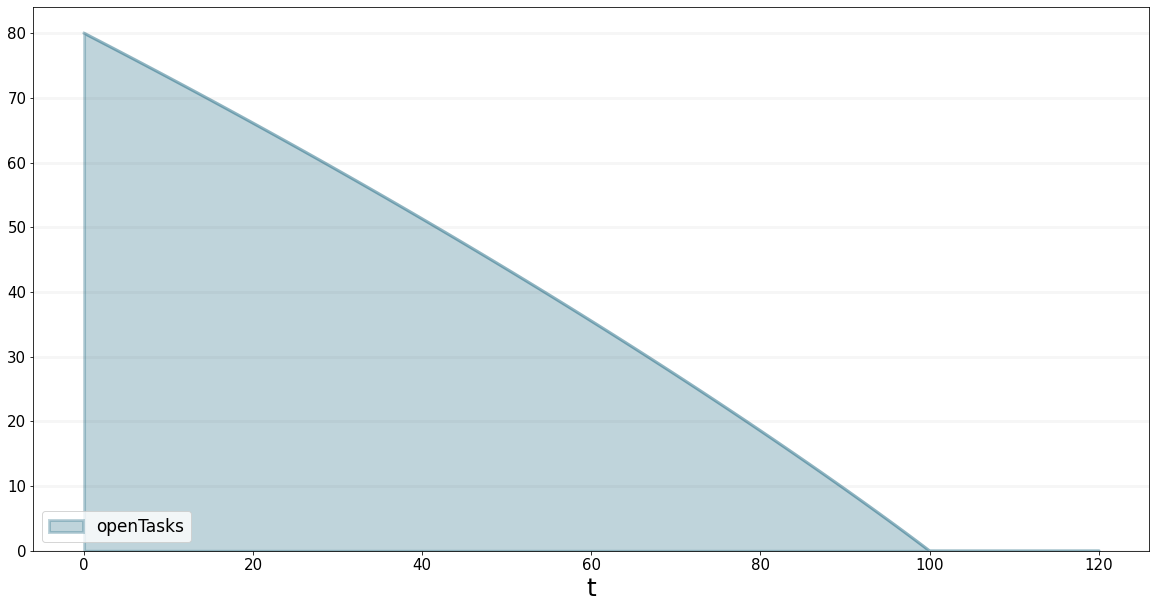

In [ ]:
bptk.plot_scenarios(
    scenarios="scenario80",
    scenario_managers="smSimpleProjectManagementDSL",
    equations="openTasks")

In [ ]:
bptk.register_scenarios(
    scenarios =
    {
         "scenario100": {
        
        },
        "scenario120": {
            "constants": {
                "initialOpenTasks" : 120
            }
        }
    },
    scenario_manager="smSimpleProjectManagementDSL")

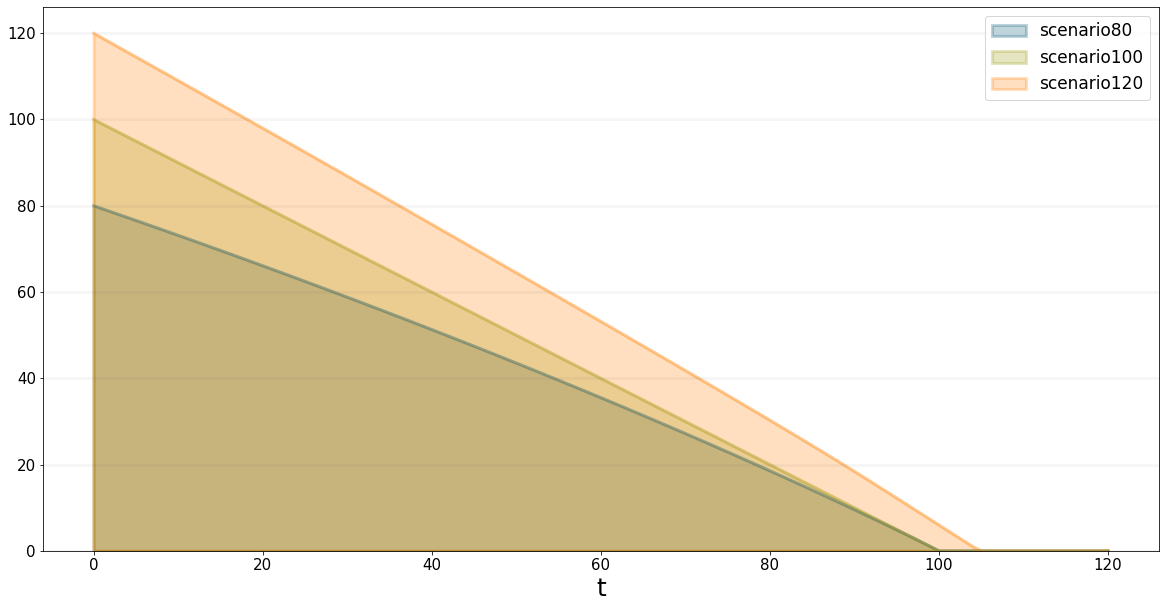

In [ ]:
bptk.plot_scenarios(
    scenarios="scenario80,scenario100,scenario120",
    scenario_managers="smSimpleProjectManagementDSL",
    equations="openTasks",
    series_names={
        "smSimpleProjectManagementDSL_scenario80_openTasks":"scenario80",
        "smSimpleProjectManagementDSL_scenario100_openTasks":"scenario100",
        "smSimpleProjectManagementDSL_scenario120_openTasks":"scenario120"
    }
)